Epoch [1/5], Train Loss: 0.8105, Test Loss: 0.4716
Epoch [2/5], Train Loss: 0.3076, Test Loss: 0.3627
Epoch [3/5], Train Loss: 0.2298, Test Loss: 0.3435
Epoch [4/5], Train Loss: 0.1911, Test Loss: 0.3074
Epoch [5/5], Train Loss: 0.1528, Test Loss: 0.3024


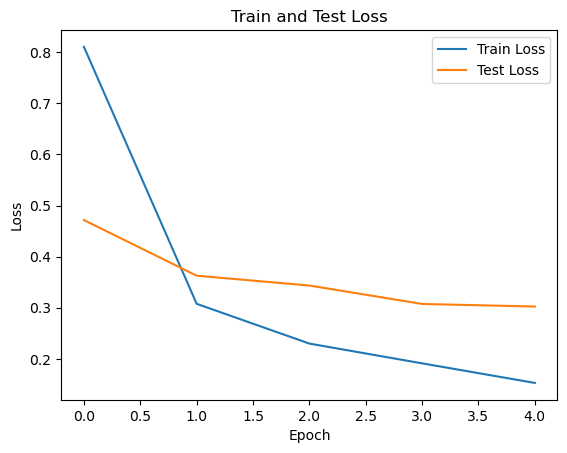

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Setup device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

# Define subset sizes
train_subset_size = 6000
test_subset_size = 6000

# MNIST dataset
full_train_dataset = torchvision.datasets.MNIST(root='./data/',
                                                train=True,
                                                transform=transforms.ToTensor(),
                                                download=True)
full_test_dataset = torchvision.datasets.MNIST(root='./data/',
                                               train=False,
                                               transform=transforms.ToTensor())

# Create subsets of train and test datasets
train_subset = torch.utils.data.Subset(full_train_dataset, range(train_subset_size))
test_subset = torch.utils.data.Subset(full_test_dataset, range(test_subset_size))

# Data loaders
train_loader = torch.utils.data.DataLoader(dataset=train_subset,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_subset,
                                          batch_size=batch_size,
                                          shuffle=False)

# Fully connected neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
total_step = len(train_loader)
train_loss_list = []
test_loss_list = []
for epoch in range(num_epochs):
    # Train
    train_loss = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_loss_list.append(train_loss)

    # Test
    test_loss = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.reshape(-1, input_size).to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

    test_loss /= len(test_loader)
    test_loss_list.append(test_loss)

    # Print progress
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

# Plot train and test loss
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Test Loss')
plt.legend()
plt.show()




In [2]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 90.88333333333334 %


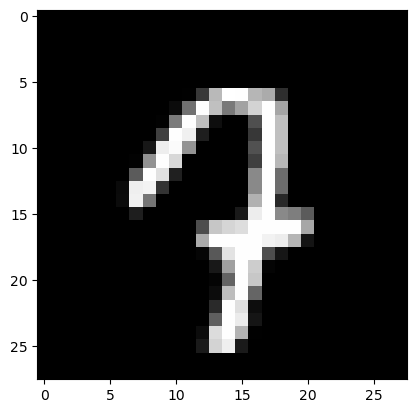

Predicted:  tensor(9)
Actual:  tensor(7)


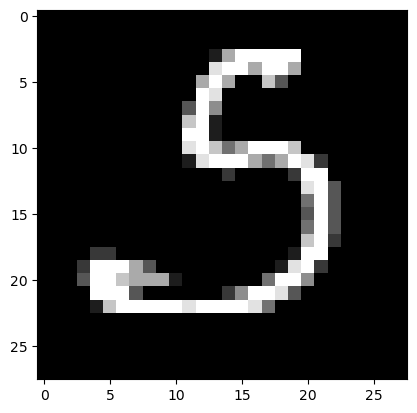

Predicted:  tensor(3)
Actual:  tensor(5)


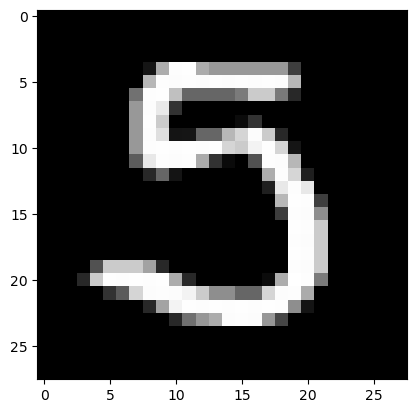

Predicted:  tensor(3)
Actual:  tensor(5)


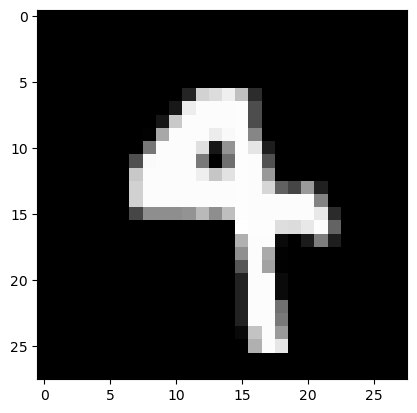

Predicted:  tensor(9)
Actual:  tensor(4)


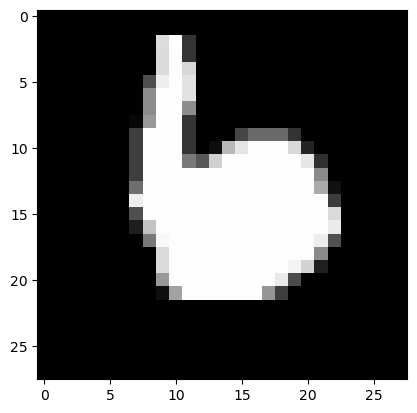

Predicted:  tensor(4)
Actual:  tensor(6)


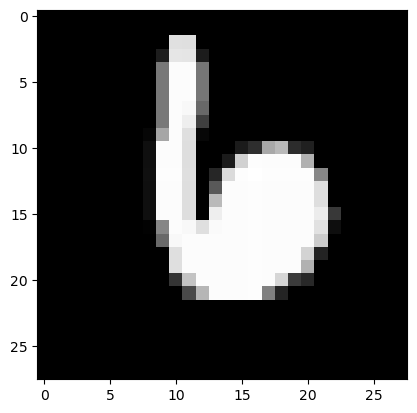

Predicted:  tensor(4)
Actual:  tensor(6)


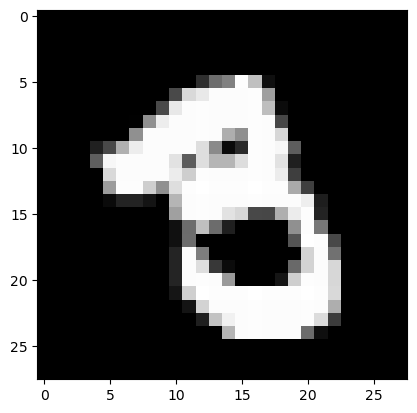

Predicted:  tensor(8)
Actual:  tensor(3)


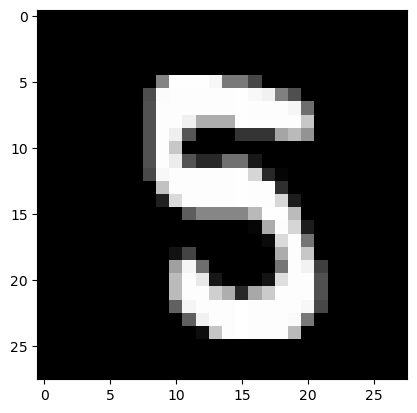

Predicted:  tensor(8)
Actual:  tensor(5)


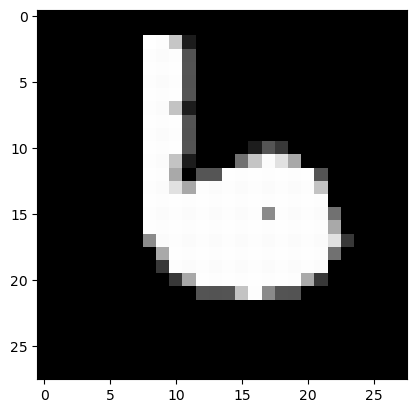

Predicted:  tensor(4)
Actual:  tensor(6)


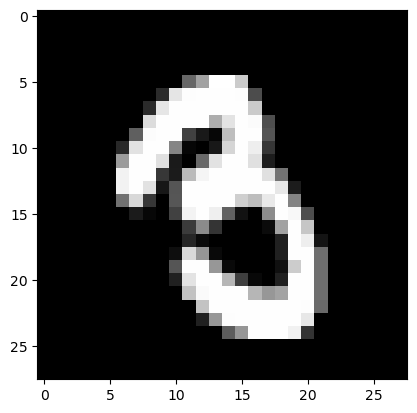

Predicted:  tensor(8)
Actual:  tensor(3)


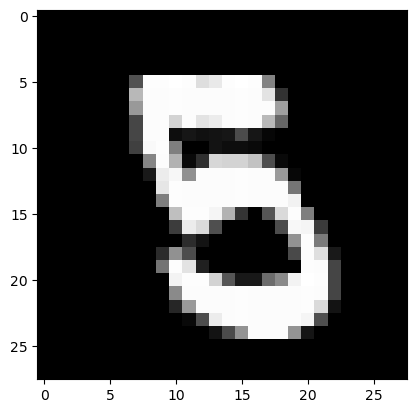

Predicted:  tensor(8)
Actual:  tensor(5)


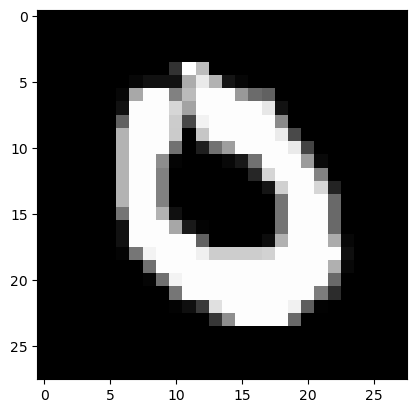

Predicted:  tensor(2)
Actual:  tensor(0)
(array([ 6, 13, 22, 36, 38, 48, 55, 57, 58, 73, 85, 87], dtype=int64),)


In [4]:
misclassified_images = (predicted != labels)
for index in np.where(misclassified_images)[0]:
    #plot each misclassified image
    images[index].shape
    plt.imshow(images[index].reshape(28,28), cmap='gray')
    plt.show()
    print("Predicted: ", predicted[index])
    print("Actual: ", labels[index])
print(np.where(misclassified_images))
